In [1]:
from rocketpy import Environment, Rocket, SolidMotor, Flight

Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2022-08-29 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.953 km
Forecast Time Period: From  2022-08-28 12:00:00  to  2022-09-13 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 4.86 m/s
Surface Wind Direction: 344.67°
Surface Wind Heading: 164.67°
Surface Pressure: 850.86 hPa
Surface Temperature: 296.64 K
Surface Air Density: 0.999 kg/m³
Surface Speed of Sound: 345.27 m/s


Atmospheric Model Plots


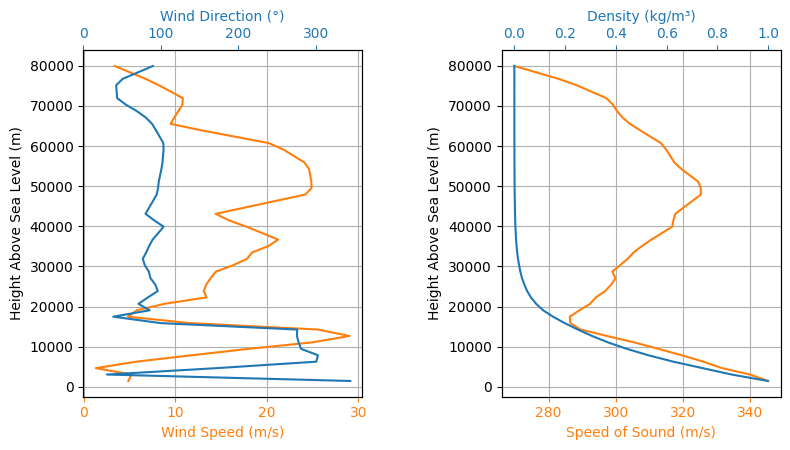

In [2]:
Env = Environment(
    railLength=5.2, 
    latitude=32.990254, 
    longitude=-106.974998, 
    elevation=1400
)

Env = Environment(
        railLength=5.2,
        latitude=32.990254,
        longitude=-106.974998,
        elevation=1400,
    )

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time

Env.setAtmosphericModel(type='Forecast', file='GFS')

Env.info()

In [3]:
Pro75M1670 = SolidMotor(
    thrustSource="../data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

In [4]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="../data/calisto/powerOffDragCurve.csv",
    powerOnDrag="../data/calisto/powerOnDragCurve.csv"
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

In [5]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -4.68 m/s
Lateral Surface Wind Speed: -1.28 m/s


 Rail Departure State

Rail Departure Time: 0.363 s
Rail Departure Velocity: 25.800 m/s
Rail Departure Static Margin: 2.133 c
Rail Departure Angle of Attack: 10.469°
Rail Departure Thrust-Weight Ratio: 10.143
Rail Departure Reynolds Number: 1.848e+05


BurnOut State

BurnOut time: 3.900 s
Altitude at burnOut: 654.051 m (AGL)
Rocket velocity at burnOut: 281.283 m/s
Freestream velocity at burnOut: 282.314 m/s
Mach Number at burnOut: 0.819
Kinetic energy at burnOut: 6.425e+05 J


Apogee

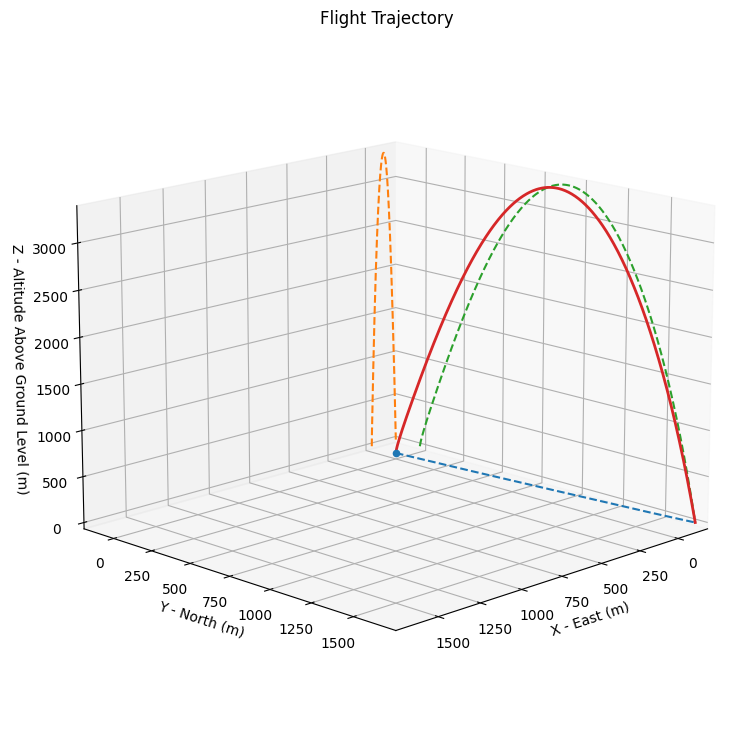



Trajectory Kinematic Plots



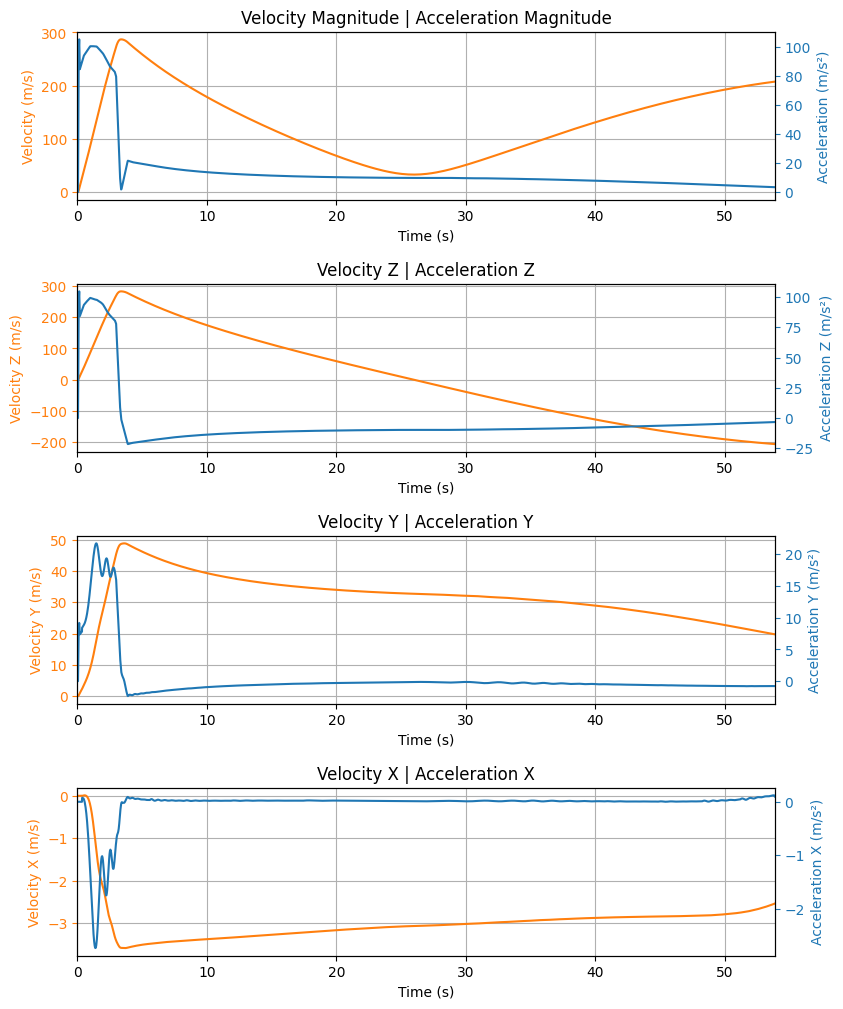



Angular Position Plots



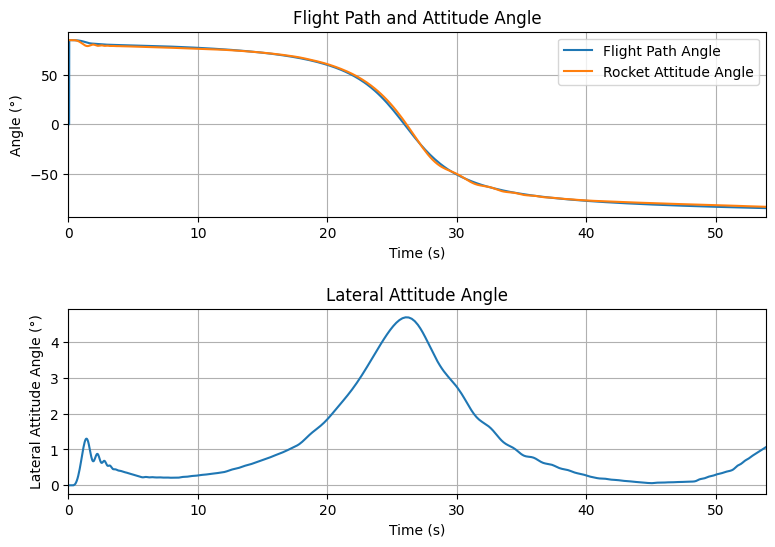



Path, Attitude and Lateral Attitude Angle plots



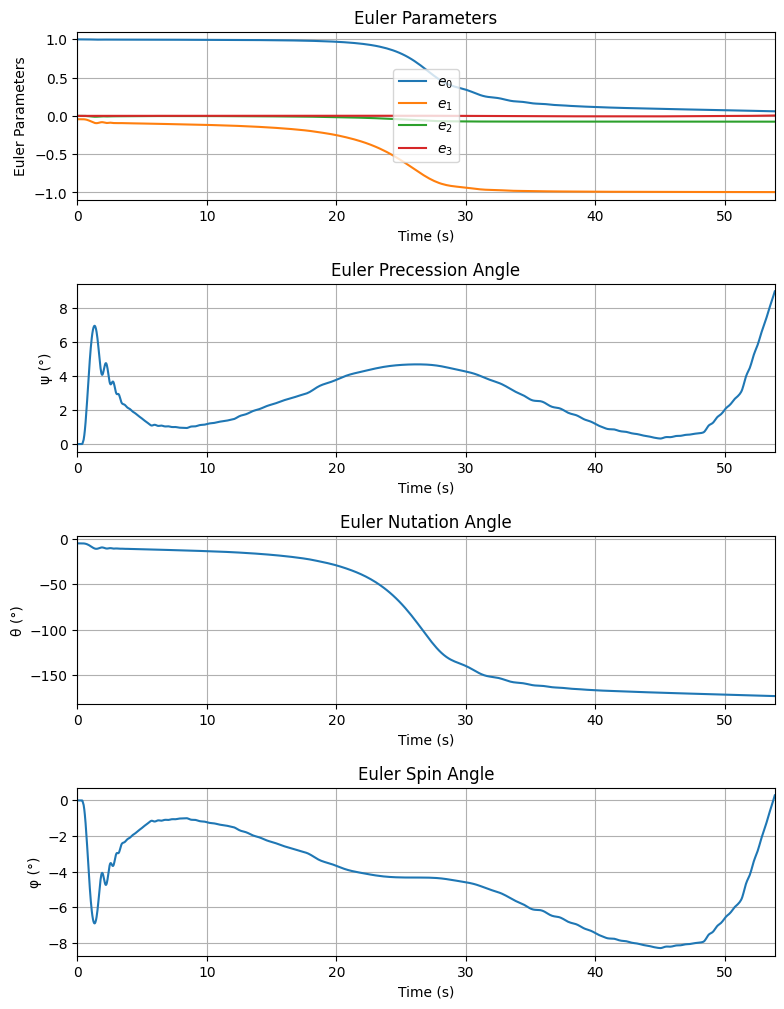



Trajectory Angular Velocity and Acceleration Plots



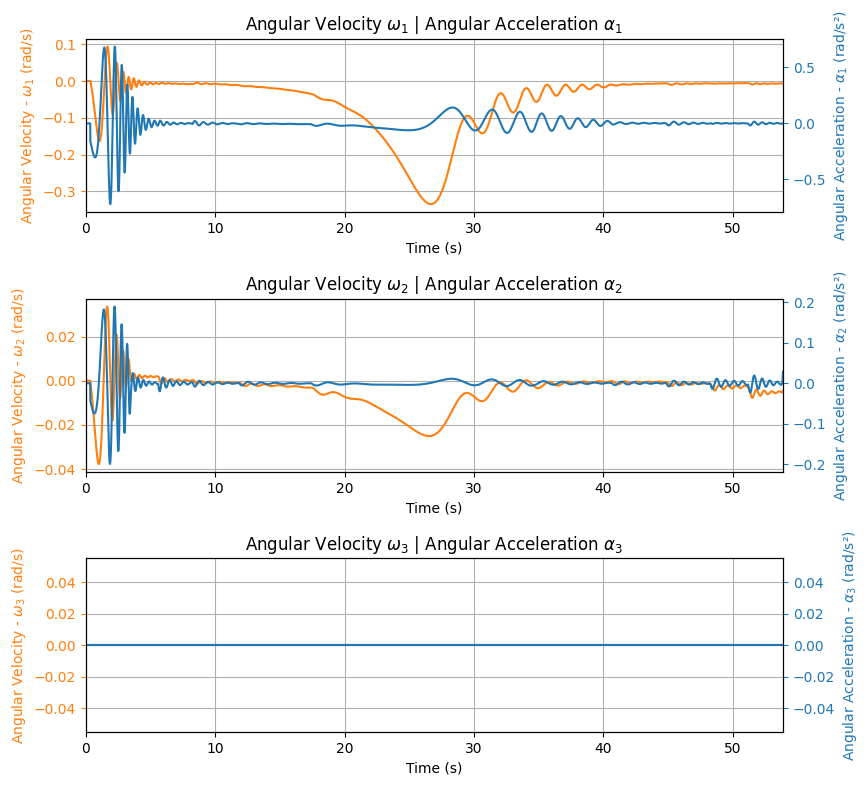



Trajectory Force Plots



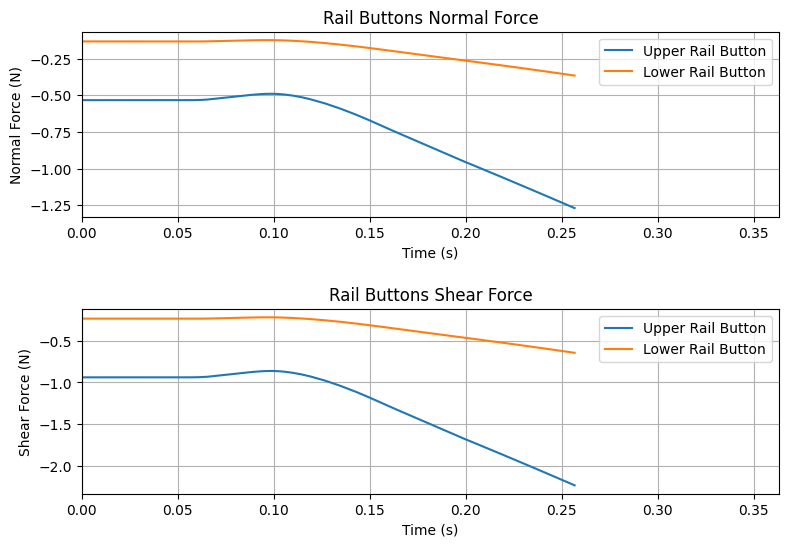

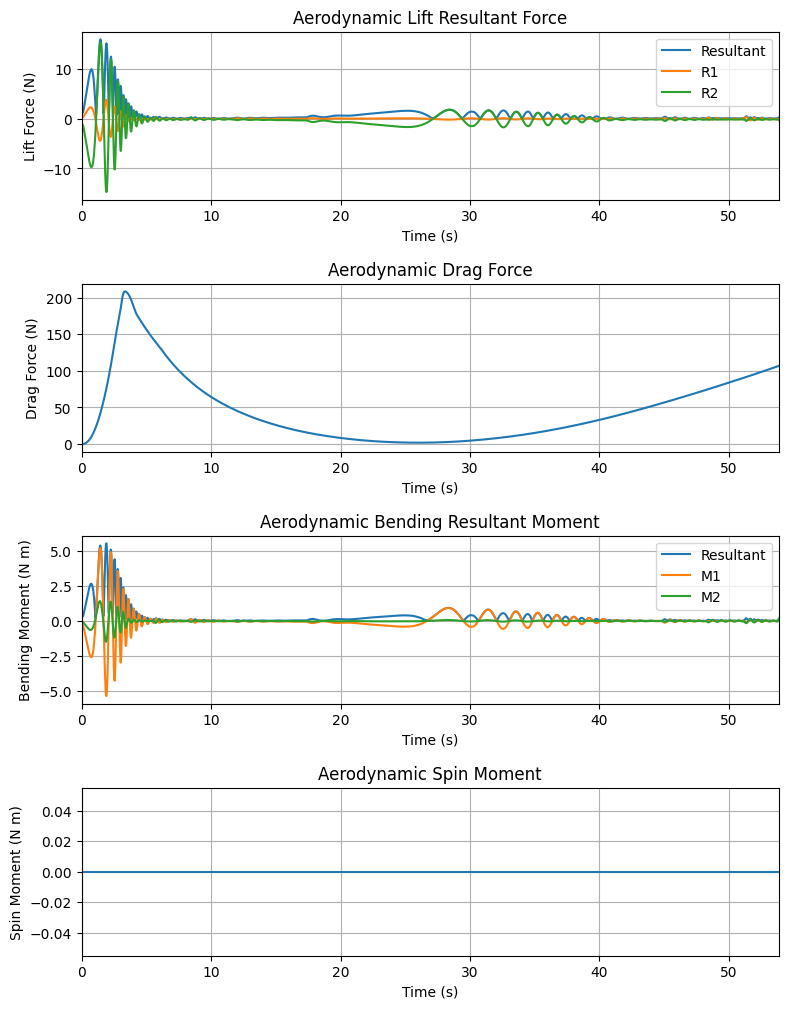



Trajectory Energy Plots



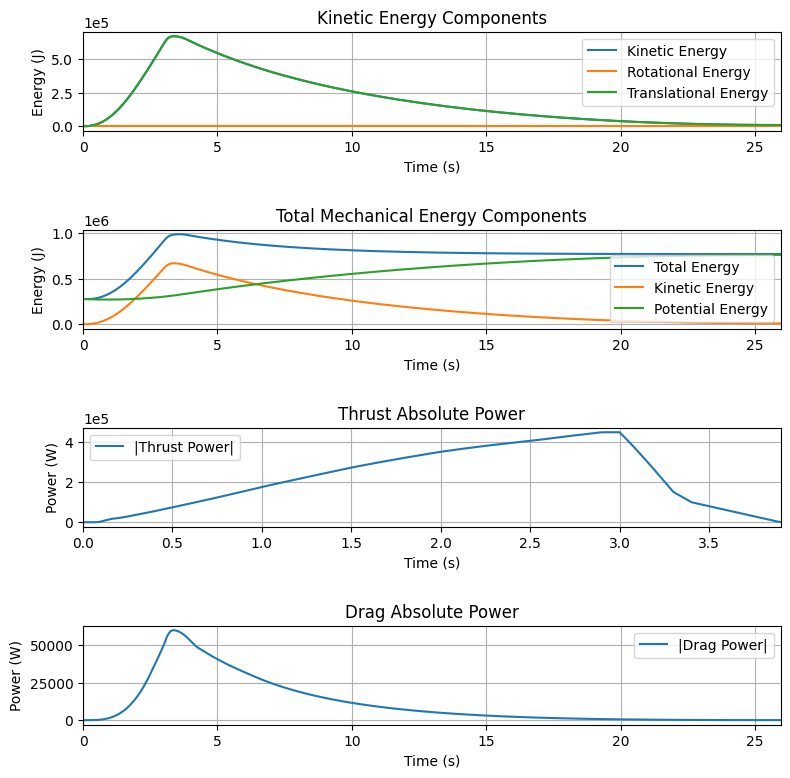



Trajectory Fluid Mechanics Plots



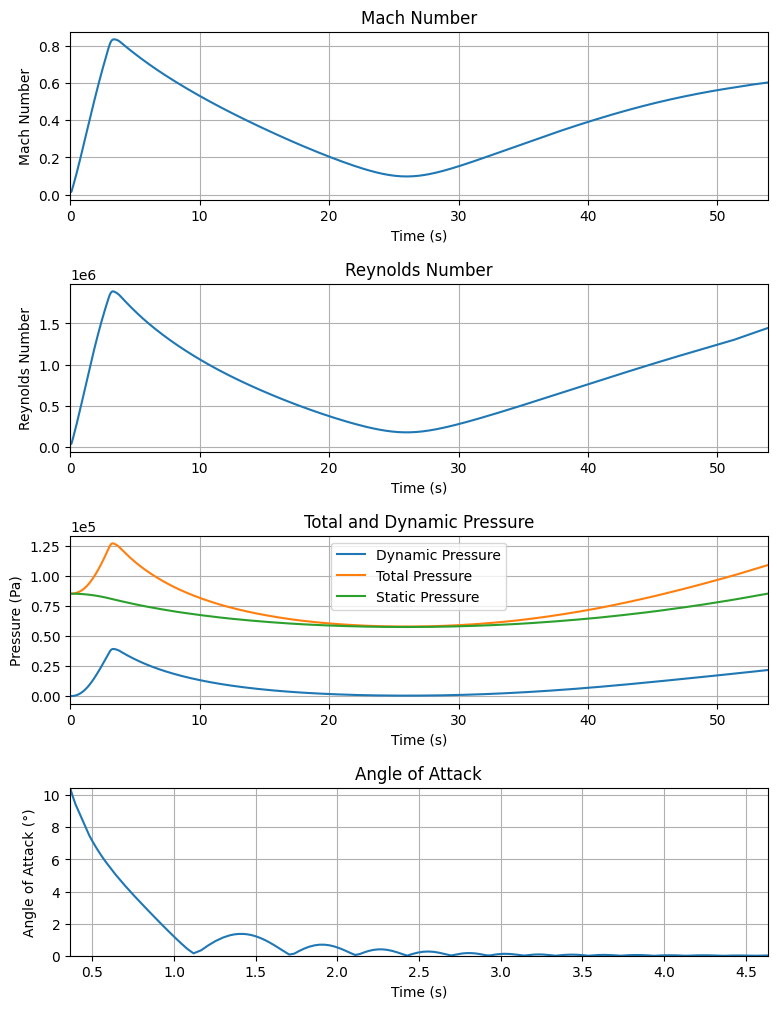



Trajectory Stability and Control Plots



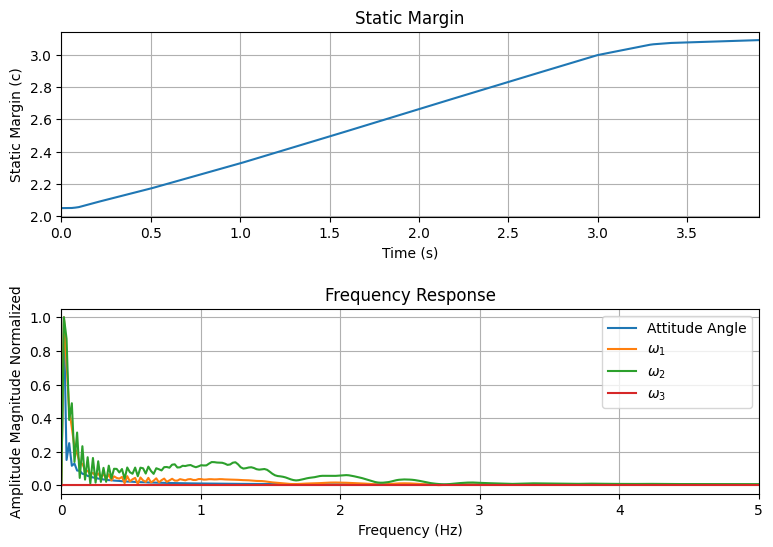

In [6]:
TestFlight.allInfo()

In [7]:
# Create Analysis object
from rocketpy import Analysis

analyzer = Analysis(TestFlight)

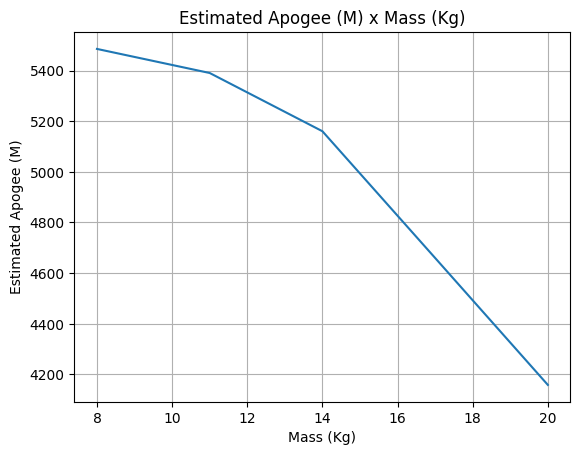

In [8]:
# test apogee finder
analyzer.apogee_by_mass().plot(8, 20, 5)

In [11]:
# test exit rail velocity finder
analyzer.rail_exit_velocity_by_mass().plot(8, 20, 5)

AttributeError: 'Analysis' object has no attribute 'rail_exit_velocity_by_mass'